In [188]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist as Hist

In [189]:
#Working with atar data

with uproot.open('/home/dylan/pioneer/simulationdata/pienux_out_stripped.root:atar') as testfile:
    print(testfile.keys())
    # print(testfile.arrays())
    data = testfile.arrays(['pixel_hits', 'pixel_pdg', 'pixel_edep', 'pixel_time'])
    print(data)
    print()


['pixel_hits', 'pixel_pdg', 'pixel_edep', 'pixel_time', 'nhit', 'has_pion', 'pion_decay', 'pion_dar', 'has_muon', 'muon_decay', 'muon_dar', 'has_positron', 'pion_total_edep', 'muon_total_edep', 'pos_total_edep', 'has_excited_nucleus', 'external_total_edep']
[{pixel_hits: [102900, 102899, 102898, 102897, ... pixel_edep: [], pixel_time: []}]



In [190]:
data = np.random.normal(50, 10, 1000)

data = np.linspace(-100, 100, 100)

h = Hist.new.Reg(100, 0, 100).Double()

h.fill(data)





Hist(Regular(100, 0, 100, label='Axis 0'), storage=Double()) # Sum: 49.0 (100.0 with flow)

In [191]:
def build_spline(hist):
    from scipy.interpolate import UnivariateSpline, CubicSpline
    
    centers = hist.axes[0].centers

    amps = h.values()/np.amax(h.values())

    spline = CubicSpline(centers, amps, extrapolate = False)

    return spline



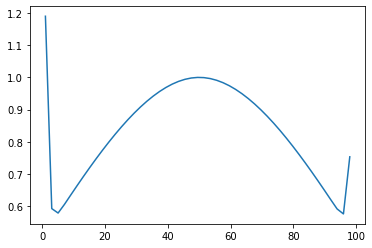

In [192]:
xs = data
ys = build_spline(h)(xs)

#The notation above creates y value arrangement of same length as xs

fig, ax = plt.subplots()

plt.plot(xs, ys)

plt.show()


In [193]:

def adjacent_pixels(pixeli, n=2, pixels_per_plane=100, **kwargs):
    '''
        Returns this pixel and the n pixels on either side in the same plane
    '''
    return [x for x in range(pixeli-n, pixeli+n+1) if (int(np.ceil(float(x)/pixels_per_plane)) == int(np.ceil(float(pixeli)/pixels_per_plane)))]

In [194]:
def adjacent_pixelsv2(pixel, n = 2):
    '''
        Returns this pixel and the n pixels on either side in the same plane. Why can't you write it like this instead of the one above?    
    '''
    
    return [x for x in range(pixel - n, pixel + n + 1)]

In [195]:
adjacent_pixelsv2(50)

[48, 49, 50, 51, 52]

In [196]:
def greetme(**kwargs):
    for key, value in kwargs.items():
        print("{0} = {1}".format(key, value))

In [197]:
greetme(name = 'dylan')

name = dylan


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f3734efe640>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

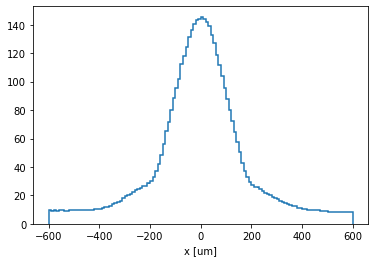

In [198]:
ref_data = '/home/dylan/pioneer/atar_waveform/atar_waveform/data/BNL_Signal_Response.root'

f = uproot.open(ref_data)

h = f['pmax_histogram'].to_hist()

h.plot()



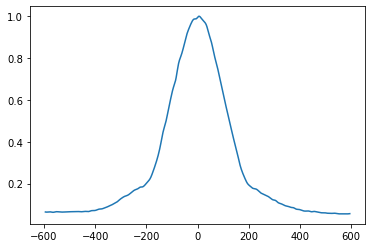

In [199]:
# Now I have to create a spline for this histogram for modelling purposes

xs = np.linspace(h.axes[0].centers[0], h.axes[0].centers[-1], 1000)
#The above creates evenly spaced values starting at one end of the histogram to the other


ys = build_spline(h)(xs)

fig, ax = plt.subplots()

plt.plot(xs, ys)

In [200]:
f = uproot.open('/home/dylan/pioneer/simulationdata/pienux_out_stripped.root:atar')

data = f['pixel_edep'].array()

# Number of vectors
len(data)


200000

In [201]:
t = uproot.open('/home/dylan/pioneer/simulationdata/pienux_out_stripped.root:atar')
data = t.arrays(['pixel_pdg', 'pixel_edep', 'pixel_time', 'pixel_hits'])
pdg = data['pixel_pdg'][0]
edep = data['pixel_edep'][0]
time = data['pixel_time'][0]
hits = data['pixel_hits'][0]


print(edep)
print(hits)
print(len(edep),
len(hits))

[0.0445, 0.0939, 0.0618, 0.0264, 0.43, ... 0.0119, 0.0512, 0.0307, 0.00183, 0.0162]
[102900, 102899, 102898, 102897, 102787, ... 100029, 100028, 100027, 100232, 100232]
72 72


In [202]:
def get_number_of_slits(spline_width, pitch, sensor_width):

    '''
        Based on slit parameters, returns how many other slits an energy 
        deposit hit can share with on one side assuming the original hit was in
        center. 
    '''

    a = spline_width - ((sensor_width/2) + pitch)
    b = sensor_width + pitch

    return int(np.floor((a/b) + 1))

In [203]:
def adjacent_slits(pixel, n, pitch = 200, width = 100):
    # return[x*pitch_plus_width + pixel for x in range(-n, n + 1)]
    slits = []
    for i in range(-n, n + 1):
        if abs(i) < n:
            slits.append(pixel + int(i * (pitch + width)))
        elif i < 0:
                slits.append(pixel + int((i + 1) * (pitch + width) - (pitch + width/2)))
        else:
            slits.append(pixel + int((i - 1) * (pitch + width) + (pitch + width/2)))  
                  
    return slits




In [204]:
print(adjacent_slits(100, 3))

[-750, -500, -200, 100, 400, 700, 950]


In [205]:
def share_energy(atar_tree, sensor_width = 100, pitch = 200):

    data = atar_tree.arrays(['pixel_pdg', 'pixel_edep', 'pixel_time', 'pixel_hits'])
    pdg = data['pixel_pdg'][0]
    edep = data['pixel_edep'][0]
    time = data['pixel_time'][0]
    hits = data['pixel_hits'][0]


    for hit in hits: 








IndentationError: expected an indented block (2896937067.py, line 16)

In [ ]:
adjacent_slits(100, 2)

In [ ]:
for i in range (-5, 5 + 1):
    print(i)

In [218]:
ref_data = '/home/dylan/pioneer/atar_waveform/atar_waveform/data/BNL_Signal_Response.root'

f = uproot.open(ref_data)

h = f['pmax_histogram'].to_hist()

spline = build_spline(h)

atar = uproot.open('/home/dylan/pioneer/simulationdata/pienux_out_stripped.root:atar')

data = atar.arrays(['pixel_pdg', 'pixel_edep', 'pixel_time', 'pixel_hits'])
pdg = data['pixel_pdg'][0]
edep = data['pixel_edep'][0]
time = data['pixel_time'][0]
hits = data['pixel_hits'][0]



for i,  hit in enumerate(hits):

    these_energies = []

    places = adjacent_slits(hit, n = 2)
            
    for pos in places:
        energyi = spline(pos - hit) * edep[i]
        these_energies.append(energyi)
    
    #Normalize the energies to conserve energy
    these_energies = np.array(these_energies) * (edep[i]/np.sum(these_energies))

# print("total Energy", np.sum(these_energies), edep[i])

        


